In [27]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import time
import matplotlib.pyplot as plt

In [28]:
data=pd.read_csv("../Study_Hopsking\data_total_load.csv")
data

,Unnamed: 0,DateTime,RealPower,mes,verano,primavera,otoño,invierno,dia,vacaciones,...,Prom_hora_mes,mayor_promedio,Hora,Prom_hora_mes_dia,mayor_promedio_dia,minute,TotalCampusLoad,OnCampusGeneration,SDG&E Import,AdjustedDemand
0,0,2019-12-31 23:45:00,38.394,12.0,0.0,0.0,0.0,1.0,31.0,1.0,...,40.048847,0.0,23.0,38.52075,0.0,45.0,29072.57,28812.395,260.169,-2883.436
1,1,2019-12-31 23:30:00,38.619,12.0,0.0,0.0,0.0,1.0,31.0,1.0,...,40.048847,0.0,23.0,38.52075,1.0,30.0,28844.49,28651.752,192.735,-3111.513
2,2,2019-12-31 23:15:00,38.577,12.0,0.0,0.0,0.0,1.0,31.0,1.0,...,40.048847,0.0,23.0,38.52075,1.0,15.0,29295.08,29066.792,228.283,-2660.925
3,3,2019-12-31 23:00:00,38.493,12.0,0.0,0.0,0.0,1.0,31.0,1.0,...,40.048847,0.0,23.0,38.52075,0.0,0.0,28629.41,28455.610,173.804,-3326.586
4,4,2019-12-31 22:45:00,38.313,12.0,0.0,0.0,0.0,1.0,31.0,1.0,...,40.184637,0.0,22.0,38.70800,0.0,45.0,28208.62,28111.096,97.523,-3747.381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26401,26401,2019-04-01 01:00:00,51.912,4.0,0.0,1.0,0.0,0.0,1.0,0.0,...,51.763875,1.0,1.0,51.05075,1.0,0.0,32869.68,32055.630,814.050,913.680
26402,26402,2019-04-01 00:45:00,50.980,4.0,0.0,1.0,0.0,0.0,1.0,0.0,...,52.269892,0.0,0.0,51.17875,0.0,45.0,32870.50,32105.054,765.447,914.501
26403,26403,2019-04-01 00:30:00,51.873,4.0,0.0,1.0,0.0,0.0,1.0,0.0,...,52.269892,0.0,0.0,51.17875,1.0,30.0,33259.59,32110.270,1149.313,1303.583
26404,26404,2019-04-01 00:15:00,51.186,4.0,0.0,1.0,0.0,0.0,1.0,0.0,...,52.269892,0.0,0.0,51.17875,1.0,15.0,33134.33,28667.089,4467.250,1178.339


In [29]:
from datetime import datetime

data['timestamp_numeric'] = data['DateTime'].apply(lambda x: int(datetime.strptime(x, "%Y-%m-%d %H:%M:%S").timestamp()))

data

,Unnamed: 0,DateTime,RealPower,mes,verano,primavera,otoño,invierno,dia,vacaciones,...,mayor_promedio,Hora,Prom_hora_mes_dia,mayor_promedio_dia,minute,TotalCampusLoad,OnCampusGeneration,SDG&E Import,AdjustedDemand,timestamp_numeric
0,0,2019-12-31 23:45:00,38.394,12.0,0.0,0.0,0.0,1.0,31.0,1.0,...,0.0,23.0,38.52075,0.0,45.0,29072.57,28812.395,260.169,-2883.436,1577861100
1,1,2019-12-31 23:30:00,38.619,12.0,0.0,0.0,0.0,1.0,31.0,1.0,...,0.0,23.0,38.52075,1.0,30.0,28844.49,28651.752,192.735,-3111.513,1577860200
2,2,2019-12-31 23:15:00,38.577,12.0,0.0,0.0,0.0,1.0,31.0,1.0,...,0.0,23.0,38.52075,1.0,15.0,29295.08,29066.792,228.283,-2660.925,1577859300
3,3,2019-12-31 23:00:00,38.493,12.0,0.0,0.0,0.0,1.0,31.0,1.0,...,0.0,23.0,38.52075,0.0,0.0,28629.41,28455.610,173.804,-3326.586,1577858400
4,4,2019-12-31 22:45:00,38.313,12.0,0.0,0.0,0.0,1.0,31.0,1.0,...,0.0,22.0,38.70800,0.0,45.0,28208.62,28111.096,97.523,-3747.381,1577857500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26401,26401,2019-04-01 01:00:00,51.912,4.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,51.05075,1.0,0.0,32869.68,32055.630,814.050,913.680,1554102000
26402,26402,2019-04-01 00:45:00,50.980,4.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,51.17875,0.0,45.0,32870.50,32105.054,765.447,914.501,1554101100
26403,26403,2019-04-01 00:30:00,51.873,4.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,51.17875,1.0,30.0,33259.59,32110.270,1149.313,1303.583,1554100200
26404,26404,2019-04-01 00:15:00,51.186,4.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,51.17875,1.0,15.0,33134.33,28667.089,4467.250,1178.339,1554099300


In [30]:
data["temp"].describe()

count    26406.000000
mean        10.176827
std         86.531745
min       -999.900000
25%         15.560000
50%         17.800000
75%         20.000000
max         34.400000
Name: temp, dtype: float64

In [31]:
data = data[data['temp'] >= 0]
data = data[data['RealPower'] >= 0]
data.describe()

,Unnamed: 0,RealPower,mes,verano,primavera,otoño,invierno,dia,vacaciones,clases_verano,...,mayor_promedio,Hora,Prom_hora_mes_dia,mayor_promedio_dia,minute,TotalCampusLoad,OnCampusGeneration,SDG&E Import,AdjustedDemand,timestamp_numeric
count,26213.000000,26213.000000,26213.000000,26213.000000,26213.000000,26213.000000,26213.000000,26213.000000,26213.000000,26213.000000,...,26213.000000,26213.000000,26213.000000,26213.000000,26213.000000,26213.000000,26213.000000,26213.000000,26213.000000,2.621300e+04
mean,13255.665891,48.322537,7.992904,0.336970,0.223439,0.326060,0.113531,15.672491,0.454126,0.249037,...,0.667493,11.498684,48.321490,0.563346,22.499714,34919.996949,29108.208225,5812.014796,2964.223020,1.565931e+09
std,7625.531286,5.729682,2.583555,0.472684,0.416558,0.468778,0.317247,8.765406,0.497901,0.432463,...,0.471120,6.922979,5.495768,0.495980,16.771597,3436.333662,4550.827721,5659.194011,3436.332671,6.862456e+06
min,0.000000,8.410000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,24.301250,0.000000,0.000000,26852.870000,2370.419000,-2250.200000,-5103.138000,1.554098e+09
25%,6745.000000,45.873000,6.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,...,0.000000,5.000000,46.143500,0.000000,0.000000,32280.160000,29785.644000,1645.310000,324.164000,1.559995e+09
50%,13299.000000,48.329000,8.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,...,1.000000,11.000000,48.328750,1.000000,15.000000,34436.230000,30404.185000,4369.000000,2480.399000,1.565892e+09
75%,19852.000000,51.812000,10.000000,1.000000,0.000000,1.000000,0.000000,23.000000,1.000000,0.000000,...,1.000000,17.000000,51.863000,1.000000,45.000000,37027.430000,31210.403000,7791.870000,5071.424000,1.571791e+09
max,26405.000000,82.339000,12.000000,1.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,...,1.000000,23.000000,75.317750,1.000000,45.000000,51437.470000,33593.590000,35281.610000,19481.464000,1.577861e+09


In [32]:
total_filas = data.shape[0]

porcentaje_entrenamiento = 0.8

# Calcula el número de filas para entrenamiento y prueba
num_filas_entrenamiento = int(total_filas * porcentaje_entrenamiento)
num_filas_prueba = total_filas - num_filas_entrenamiento

# Divide los datos
X_train = data[["mes", "verano", "primavera", "otoño", "invierno", "dia", "vacaciones", "clases_verano", "Hay_Sol", "temp", 
                "timestamp_numeric","minute","Hora","Prom_hora_mes","mayor_promedio", "Prom_hora_mes_dia", "mayor_promedio_dia",
                "TotalCampusLoad","OnCampusGeneration","SDG&E Import", "AdjustedDemand"]][:num_filas_entrenamiento]

Y_train = data["RealPower"][:num_filas_entrenamiento]

X_test = data[["mes", "verano", "primavera", "otoño", "invierno", "dia", "vacaciones", "clases_verano", "Hay_Sol", "temp", 
               "timestamp_numeric","minute","Hora","Prom_hora_mes","mayor_promedio","Prom_hora_mes_dia", "mayor_promedio_dia",
               "TotalCampusLoad","OnCampusGeneration","SDG&E Import", "AdjustedDemand"]][num_filas_entrenamiento:]
Y_test = data["RealPower"][num_filas_entrenamiento:]

print('Train set:', X_train.shape, Y_train.shape)
print('Test set:', X_test.shape, Y_test.shape)


Train set: (20970, 21) (20970,)
Test set: (5243, 21) (5243,)


In [33]:
X_train_array = X_train.to_numpy()
Y_train_array = Y_train.to_numpy()

# Creating a DataFrame from the NumPy arrays
df = pd.DataFrame({
    "mes": X_train_array[:, 0],
    "verano": X_train_array[:, 1],
    "primavera": X_train_array[:, 2],
    "otoño": X_train_array[:, 3],
    "invierno": X_train_array[:, 4],
    "dia": X_train_array[:, 5],
    "vacaciones": X_train_array[:, 6],
    "clases_verano": X_train_array[:, 7],
    "Hay_Sol": X_train_array[:, 8],
    "temp": X_train_array[:, 9],
    "timestamp_numeric": X_train_array[:, 10],
    "minute": X_train_array[:, 11],
    "Hora": X_train_array[:, 12],
    "Prom_hora_mes": X_train_array[:, 13],
    "mayor_promedio": X_train_array[:, 14],
    "TotalCampusLoad": X_train_array[:, 15],
    "OnCampusGeneration": X_train_array[:, 16],
    "SDG&E Import": X_train_array[:, 17],
    "AdjustedDemand": X_train_array[:, 18],
    "Prom_hora_mes_dia": X_train_array[:, 19],
    "mayor_promedio_dia": X_train_array[:, 20],

    "RealPower": Y_train_array.flatten()
})

In [34]:
s1=MinMaxScaler(feature_range=(-1,1))
Xs=s1.fit_transform(df[["mes", "verano", "primavera", "otoño", "invierno", "dia", "vacaciones", "clases_verano", "Hay_Sol", "temp", 
                        "timestamp_numeric","minute","Hora","Prom_hora_mes","mayor_promedio","Prom_hora_mes_dia", "mayor_promedio_dia",
                        "TotalCampusLoad","OnCampusGeneration","SDG&E Import", "AdjustedDemand"]])

s2=MinMaxScaler(feature_range=(-1,1))
Ys=s2.fit_transform(df[["RealPower"]])

In [35]:
window=96
X=[]
Y=[]
for i in range(window, len(Xs)):
    X.append(Xs[i-window:i,:])
    Y.append(Ys[i])
X,Y=np.array(X), np.array(Y)


In [36]:
model=Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 21)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer="adam", loss="mean_squared_error",
              metrics=["accuracy", ])

es=EarlyStopping(monitor="loss", mode="min",
                 verbose=1, patience=10)

t0=time.time()

history=model.fit(X,Y,epochs=10,batch_size=250,
                  callbacks=[es], verbose=1)

t1=time.time()

print("Runtime:%.2f s" % (t1-t0))

Epoch 1/10
84/84 [==============================] - 51s 515ms/step - loss: 0.0124 - accuracy: 0.0000e+00
Epoch 2/10
84/84 [==============================] - 40s 475ms/step - loss: 0.0079 - accuracy: 0.0000e+00
Epoch 3/10
84/84 [==============================] - 37s 446ms/step - loss: 0.0071 - accuracy: 0.0000e+00
Epoch 4/10
84/84 [==============================] - 39s 461ms/step - loss: 0.0065 - accuracy: 4.7906e-05
Epoch 5/10
84/84 [==============================] - 38s 456ms/step - loss: 0.0061 - accuracy: 4.7906e-05
Epoch 6/10
84/84 [==============================] - 40s 479ms/step - loss: 0.0058 - accuracy: 4.7906e-05
Epoch 7/10
84/84 [==============================] - 44s 521ms/step - loss: 0.0054 - accuracy: 4.7906e-05
Epoch 8/10
84/84 [==============================] - 43s 506ms/step - loss: 0.0051 - accuracy: 0.0000e+00
Epoch 9/10
84/84 [==============================] - 42s 498ms/step - loss: 0.0047 - accuracy: 4.7906e-05
Epoch 10/10
84/84 [==============================] - 53

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


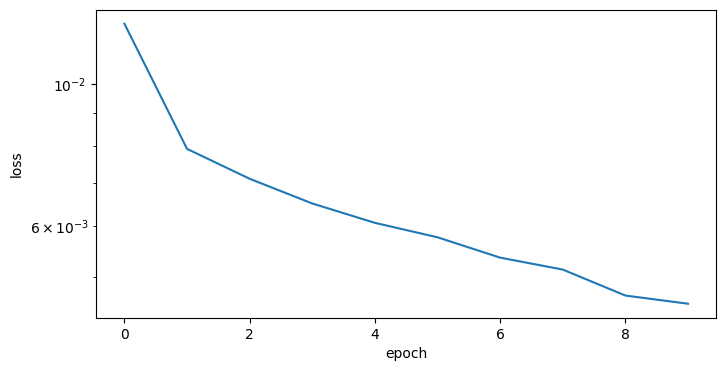

In [37]:
plt.figure(figsize=(8,4))
plt.semilogy(history.history["loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
model.save("model")

In [38]:
Yp=model.predict(X)

Yu=s2.inverse_transform(Yp)
Ym=s2.inverse_transform(Y)

653/653 [==============================] - 54s 79ms/step


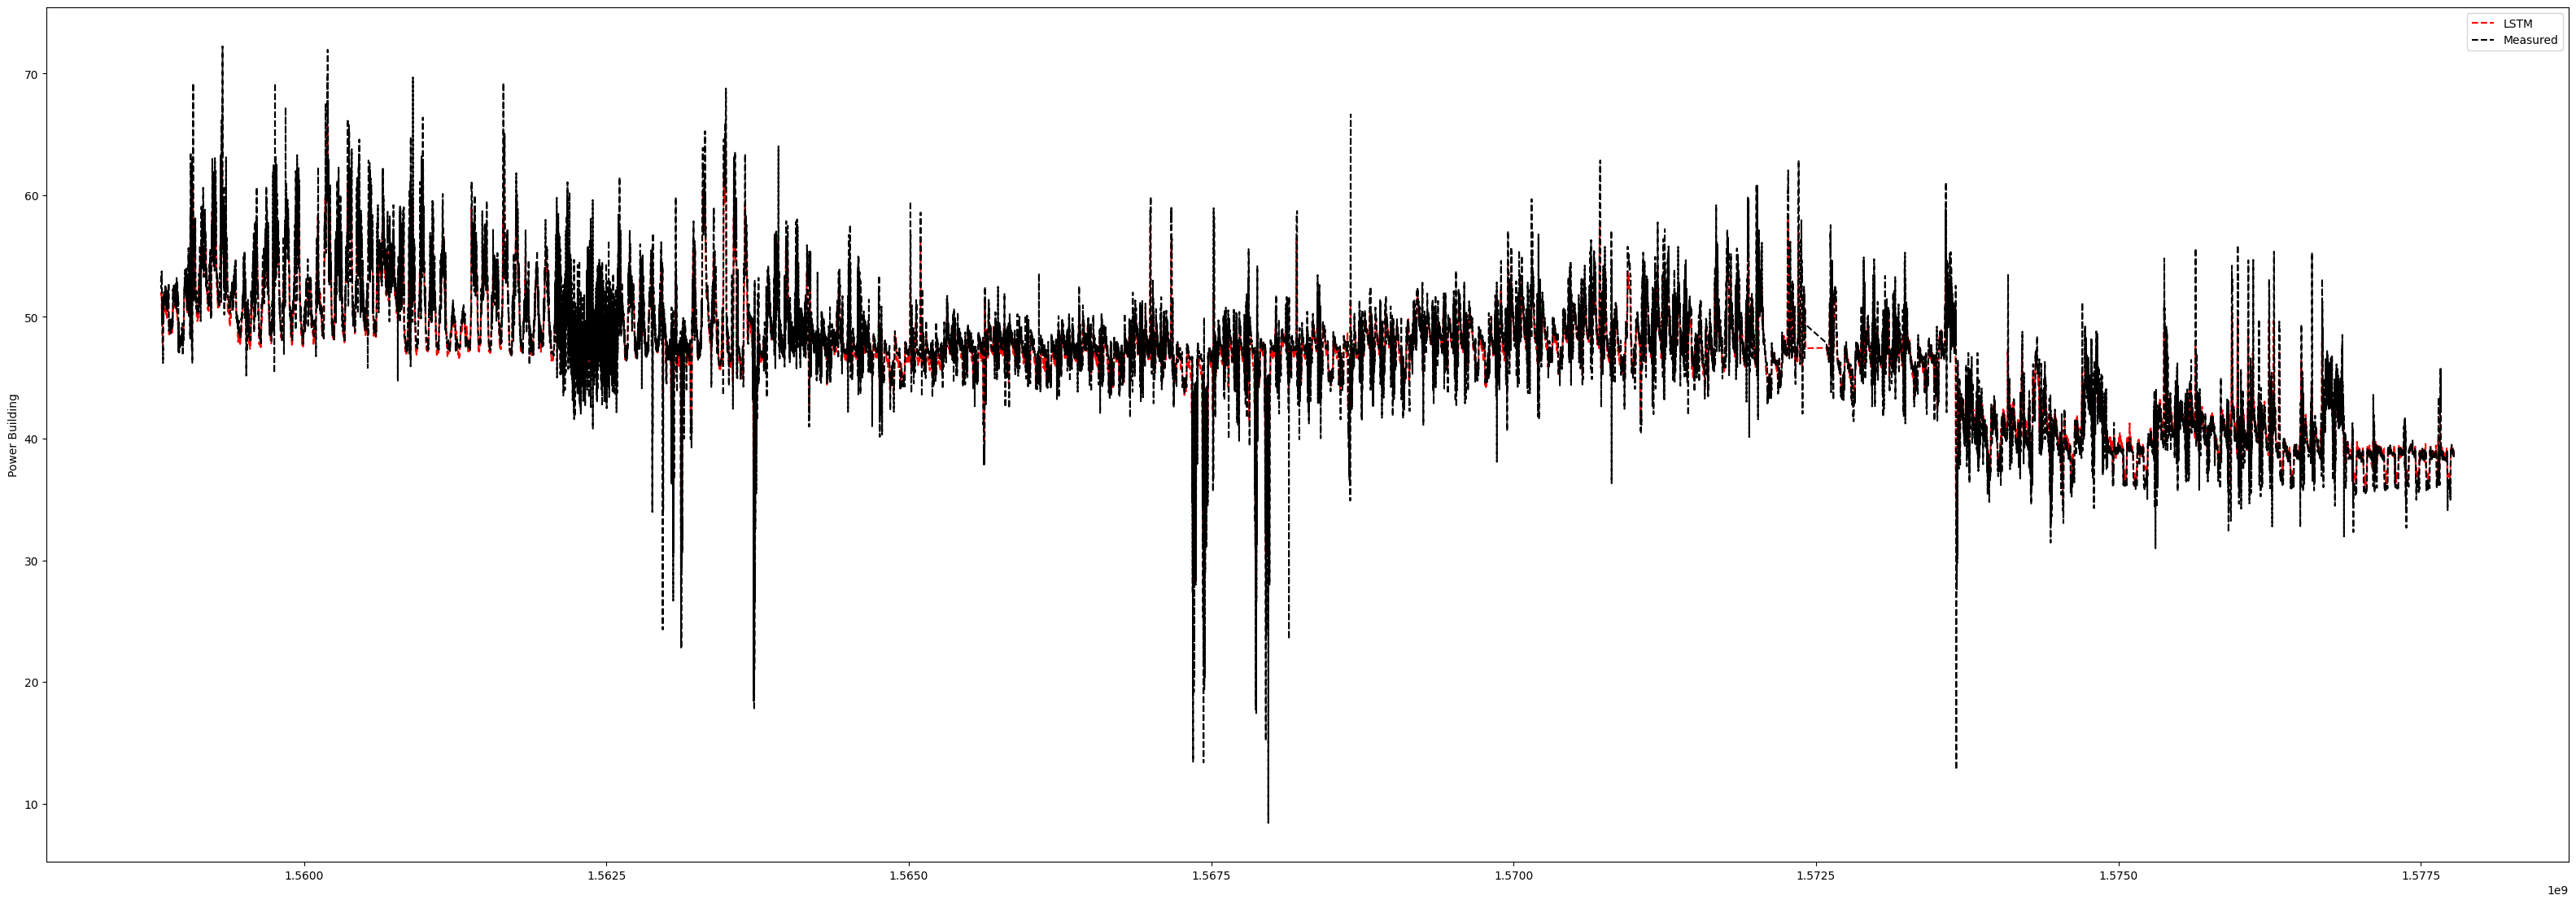

In [39]:
plt.figure(figsize=(40,30))
plt.subplot(2,1,1)
plt.plot(df["timestamp_numeric"][window:], Yu, "r--", label="LSTM")
plt.plot(df["timestamp_numeric"][window:], Ym, "k--", label="Measured")
plt.ylabel("Power Building")
plt.legend()

In [40]:
v=load_model("model")

X_test_array = X_test.to_numpy()
Y_test_array = Y_test.to_numpy()

test = pd.DataFrame({
    "mes": X_test_array[:, 0],
    "verano": X_test_array[:, 1],
    "primavera": X_test_array[:, 2],
    "otoño": X_test_array[:, 3],
    "invierno": X_test_array[:, 4],
    "dia": X_test_array[:, 5],
    "vacaciones": X_test_array[:, 6],
    "clases_verano": X_test_array[:, 7],
    "Hay_Sol": X_test_array[:, 8],
    "temp": X_test_array[:, 9],
    "timestamp_numeric": X_test_array[:, 10],
    "minute": X_test_array[:, 11],
    "Hora": X_test_array[:, 12],
    "Prom_hora_mes": X_test_array[:, 13],
    "mayor_promedio": X_test_array[:, 14],
    "TotalCampusLoad": X_test_array[:, 15],
    "OnCampusGeneration": X_test_array[:, 16],
    "SDG&E Import": X_test_array[:, 17],
    "AdjustedDemand": X_test_array[:, 18],
    "Prom_hora_mes_dia": X_test_array[:, 19],
    "mayor_promedio_dia": X_test_array[:, 20],

    "RealPower": Y_test_array.flatten()
})

In [43]:
Xt=test[["mes", "verano", "primavera", "otoño", "invierno", "dia", "vacaciones", "clases_verano", "Hay_Sol", "temp", 
         "timestamp_numeric","minute","Hora","Prom_hora_mes","mayor_promedio", "Prom_hora_mes_dia", "mayor_promedio_dia",
         "TotalCampusLoad","OnCampusGeneration","SDG&E Import", "AdjustedDemand"]].values
Yt=test[["RealPower"]].values

In [44]:
Xts=s1.transform(Xt)
Yts=s2.transform(Yt)

C:\Users\giuliana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\giuliana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [45]:
Yti=[]
Xti=[]

for i in range(window, len (Xts)):
    Xti.append(Xts[i-window:i,:])
    Yti.append(Yts[i])

Xti,Yti=np.array(Xti), np.array(Yti)

In [46]:
Ytp=model.predict(Xti)

Ytu=s2.inverse_transform(Ytp)
Ytm=s2.inverse_transform(Yti)

161/161 [==============================] - 10s 59ms/step


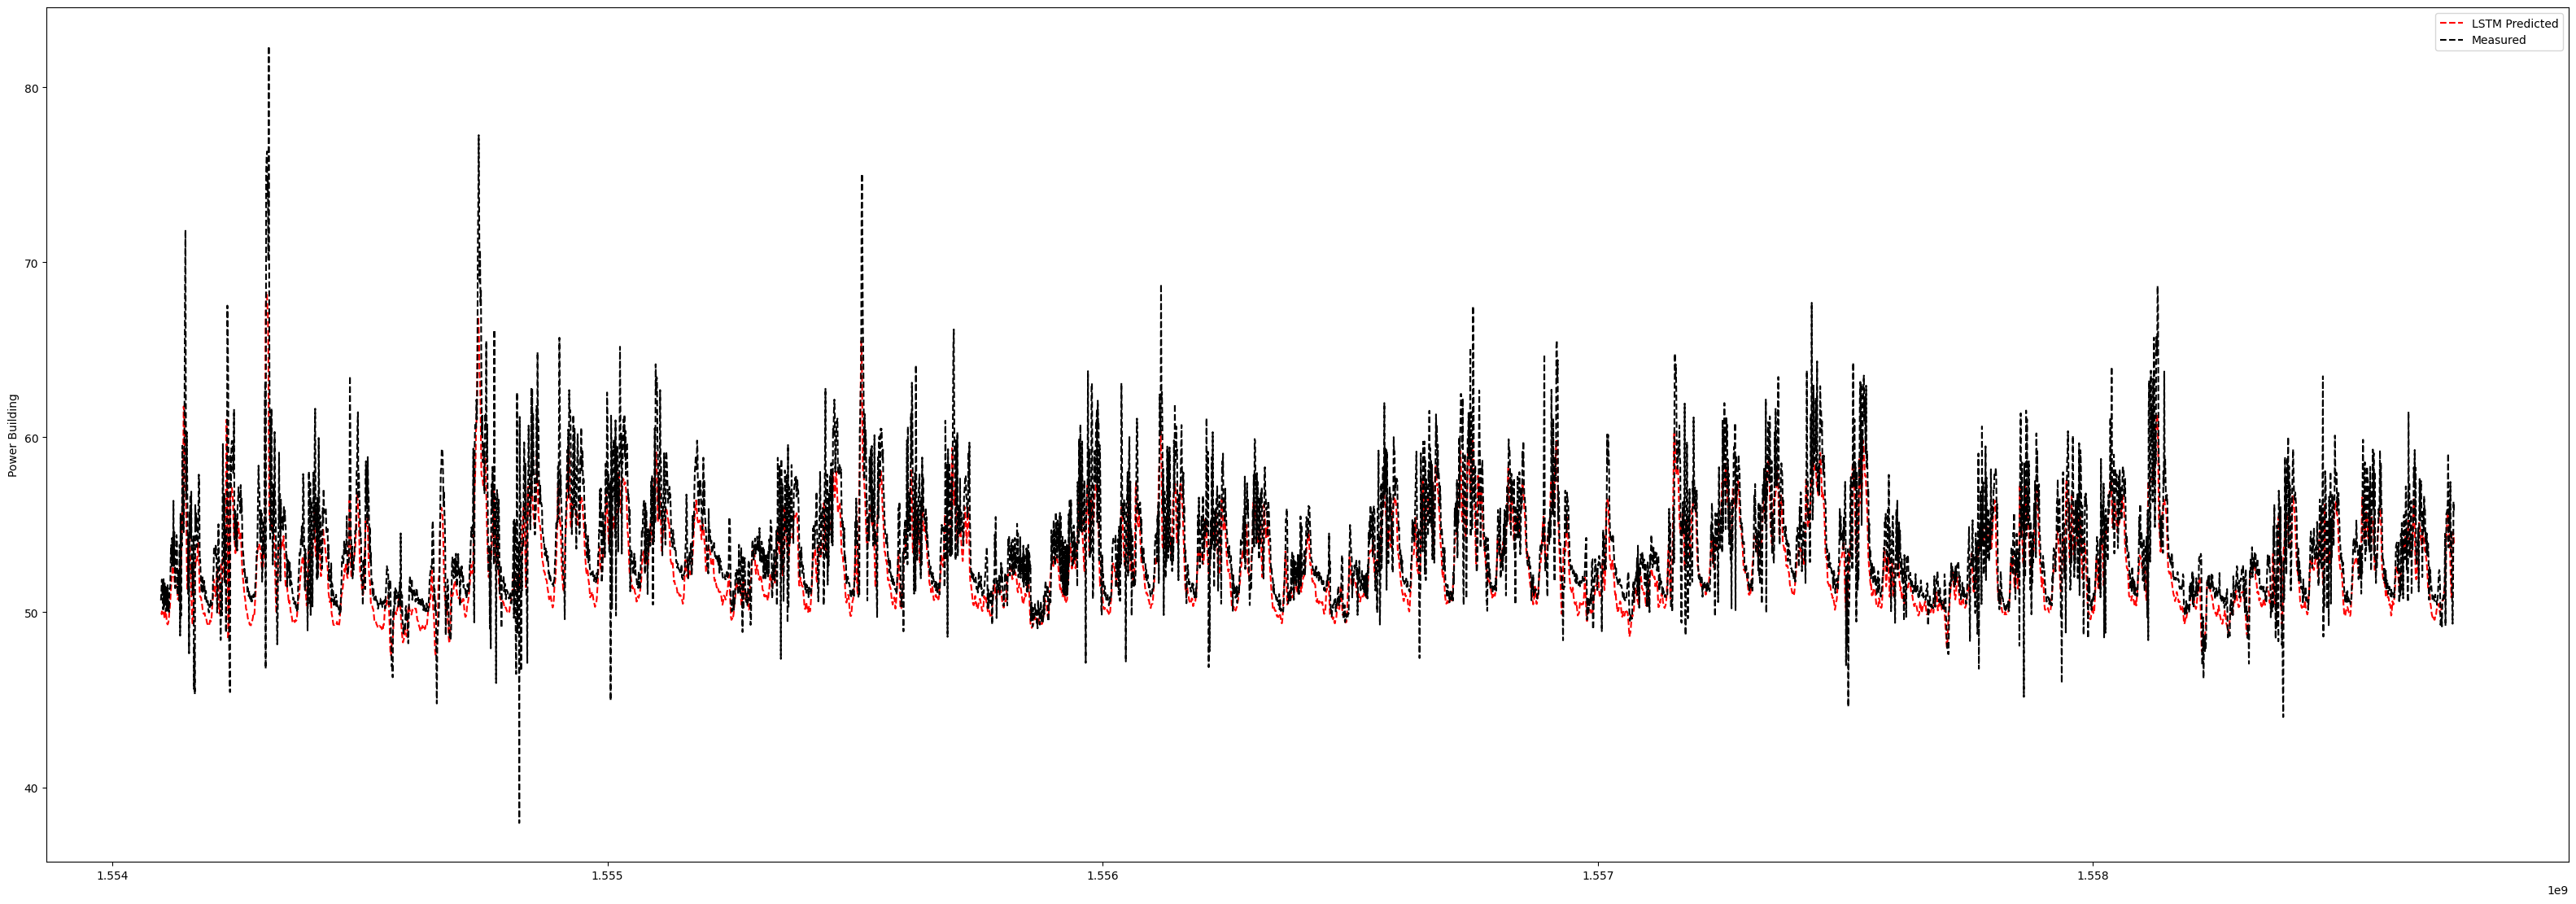

In [47]:
plt.figure(figsize=(40,30))
plt.subplot(2,1,1)
plt.plot(test["timestamp_numeric"][window:], Ytu, "r--", label="LSTM Predicted")
plt.plot(test["timestamp_numeric"][window:], Ytm, "k--", label="Measured")
plt.ylabel("Power Building")
plt.legend()